# FCV Slide Deck 
XX.

In [5]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Add the project root to the Python path
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_dir not in sys.path:
    sys.path.append(root_dir)

from src.utils import UCDP, GIC, ACLEDDataFetcher, RegionMapper

# Set visualization style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Initialize UCDP processor
ucdp = UCDP()
gic = GIC()
acled = ACLEDDataFetcher(api_key="FVlH2Cg6J1EmOKTxxsUX", email="mpurroyvitola@worldbank.org")
region_mapper = RegionMapper()

print("✓ Setup complete: All required libraries imported and styles set")

✓ Setup complete: All required libraries imported and styles set


# Data Processing

In [6]:
raw_data = ucdp.fetch_ucdp_data()
df_conflicts = ucdp.process_conflict_data(raw_data)
df_avg_duration = ucdp.calculate_average_duration(raw_data)
df_gic = gic.processed_data

# Initialize ACLED data fetcher
# Create date objects
start_date = datetime(2013, 1, 1)
end_date = datetime(2025, 1, 31)

# Fetch raw data
df_acled = acled.fetch_data(start_date, end_date)

# Process the data
df_acled_processed = acled.process_data(df_acled)

# Get conflict-related deaths if needed
df_acled_crd = acled.get_conflict_related_deaths(df_acled_processed)

# Get event counts if needed
df_acled_events = acled.get_event_counts(df_acled_processed)
    

1000 records fetched so far, fetching next page...
Retrieved all 1686 records
Total records fetched: 1686

Processed data summary:
Years covered: 1959-2023
Number of years: 65
Total conflicts: 1686


c:\Users\wb617270\OneDrive - WBG\FCV\slide-deck-analytics\src\utils.py:547: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_counts = non_gang_data.groupby(['iso3', 'year', 'month', 'event_type']).size().unstack(fill_value=0)


In [9]:
print(df_acled_crd.tail())

     iso3  year  month  ACLED_conflict_related_deaths
6423  ZWE  2023     10                              2
6424  ZWE  2023     11                              1
6425  ZWE  2023     12                              2
6426  ZWE  2024      3                              3
6427  ZWE  2024      8                              1


# Figure 1: Number of Armed Conflicts by Type
This visualization shows the evolution of different types of conflicts over time:
- Extra-systemic conflicts: Between a state and a non-state group outside its territory
- Inter-state conflicts: Between states
- Internal conflicts: Between a government and rebel groups
- Internationalized internal conflicts: Internal conflicts with foreign government involvement

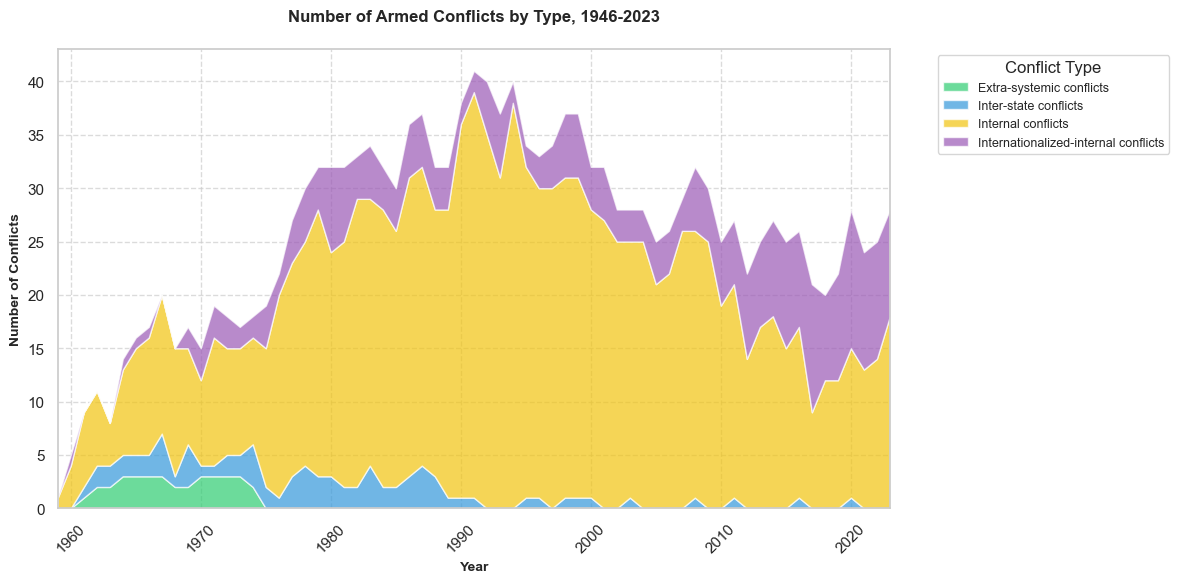


Data Summary:
Time period: 1959-2023
Total conflicts: 1686

Conflicts by type:
Extra-systemic conflicts: 35
Inter-state conflicts: 81
Internal conflicts: 1273
Internationalized-internal conflicts: 297


In [18]:
def create_conflict_plot(df, save_fig=False):
    """Create stacked area plot showing evolution of conflict types"""
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get colors for each conflict type
    colors = [UCDP.get_conflict_colors()[col] for col in df.columns]
    
    # Create stacked area plot
    ax.stackplot(df.index, 
                [df[col] for col in df.columns],
                labels=df.columns,
                colors=colors,
                alpha=0.7)
    
    # Customize plot
    ax.set_xlabel('Year', fontsize=10, fontweight='bold')
    ax.set_ylabel('Number of Conflicts', fontsize=10, fontweight='bold')
    ax.set_title('Number of Armed Conflicts by Type, 1946-2023',
                fontsize=12, pad=20, fontweight='bold')
    
    # Set x-axis range
    ax.set_xlim(df.index.min(), df.index.max())
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Add legend
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=9,
        title='Conflict Type',
        frameon=True
    )
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig('conflict_evolution.png',
                    dpi=300,
                    bbox_inches='tight')
    
    return fig

# Create and display visualization
fig = create_conflict_plot(df_conflicts)
plt.show()

# Print summary statistics
print("\nData Summary:")
print(f"Time period: {df_conflicts.index.min()}-{df_conflicts.index.max()}")
print(f"Total conflicts: {df_conflicts.sum().sum():.0f}")
print("\nConflicts by type:")
for col in df_conflicts.columns:
    print(f"{col}: {df_conflicts[col].sum():.0f}")

# Figure 2 - Average duration of armed conflict worldwide, 1965-2023
XX.

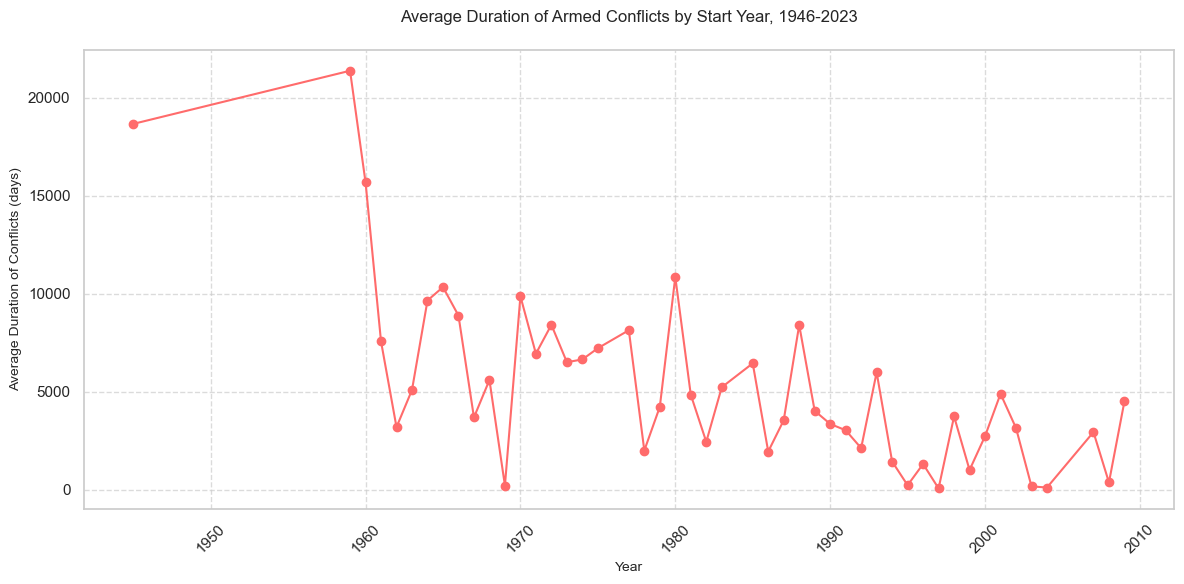


Visualization created successfully!


In [19]:
def create_conflict_duration_plot(df_avg_duration, save_fig=False):
    """
    Create and display the conflict duration visualization.
    
    Args:
        df_avg_duration (pd.DataFrame): DataFrame containing average duration data
        save_fig (bool): Whether to save the figure to file
    """
    # Validate the processed data
    if df_avg_duration.empty:
        raise ValueError("Processed data is empty")
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot average duration of conflicts by start year
    ax.plot(df_avg_duration['Year'], df_avg_duration['Average Duration'], marker='o', linestyle='-', color='#FF6B6B')
    
    # Customize the plot
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Average Duration of Conflicts (days)', fontsize=10)
    ax.set_title('Average Duration of Armed Conflicts by Start Year, 1946-2023', 
                fontsize=12, pad=20)
    
    # Customize grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save if requested
    if save_fig:
        plt.savefig('conflict_duration.png', 
                    dpi=300, 
                    bbox_inches='tight')
    
    return fig

# Generate the visualization
try:
    fig = create_conflict_duration_plot(df_avg_duration)
    plt.show()
    
    print("\nVisualization created successfully!")
    
except Exception as e:
    print(f"Error creating visualization: {str(e)}")

# Figure 3 - GLobal Coup Attempts
XX.

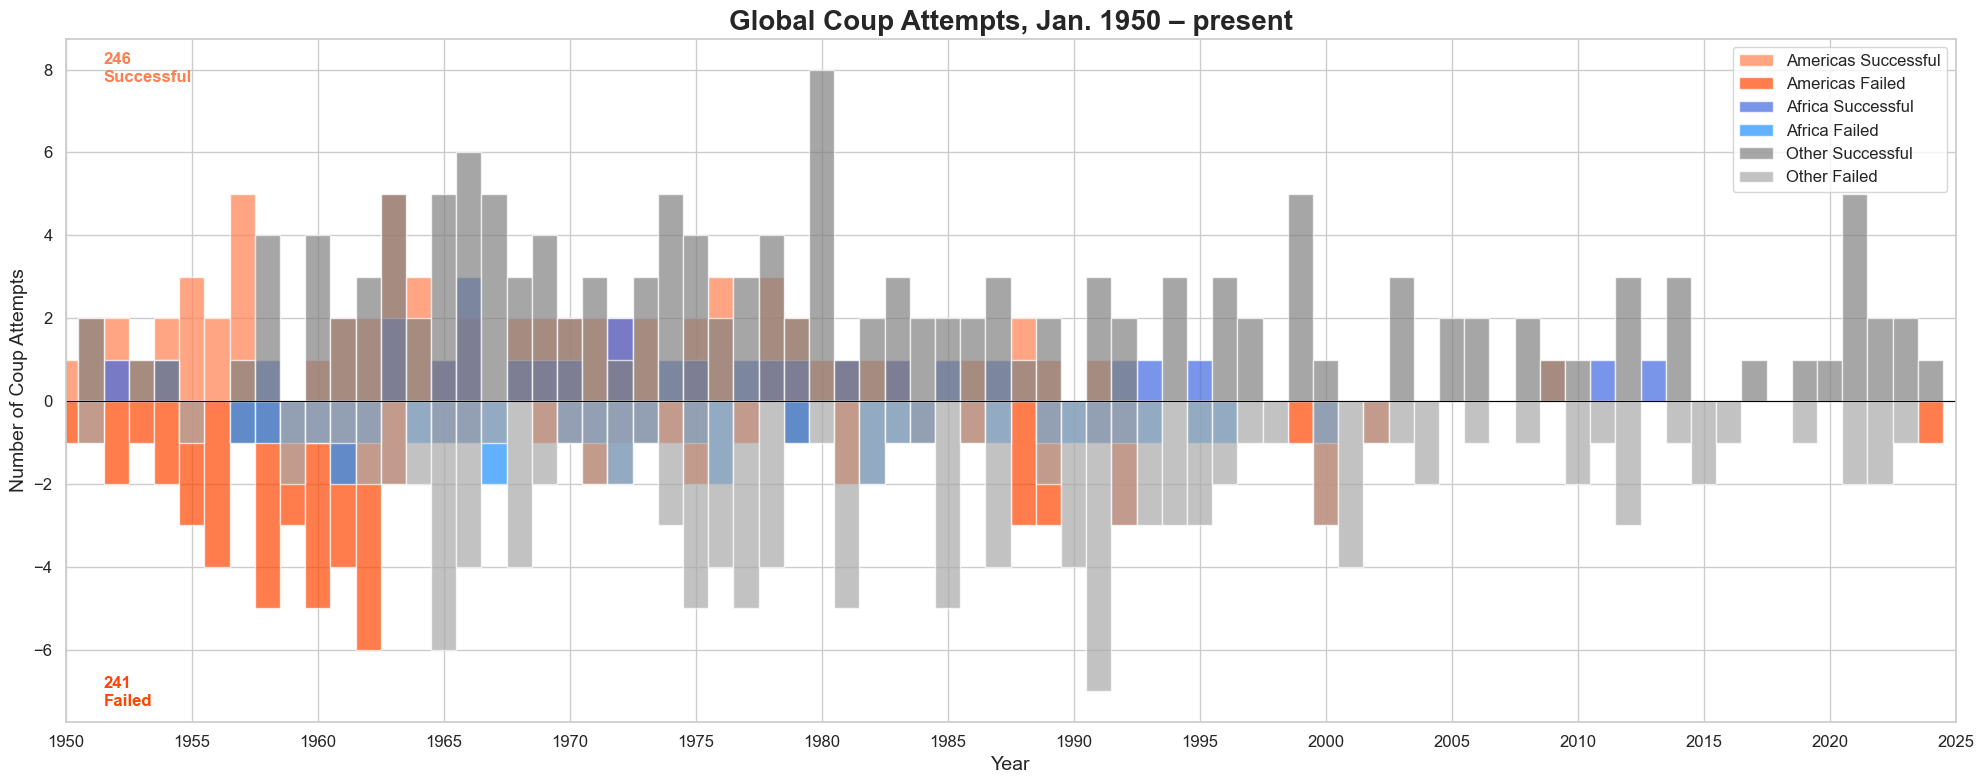

✓ Figure 3 generated successfully


In [27]:
def plot_global_coup_attempts(data, start_year=1950, end_year=2025):
    """
    Create a visualization of global coup attempts
    
    Parameters:
    -----------
    data : pandas.DataFrame
        Processed coup data 
    start_year : int, optional
        Starting year for the plot (default is 1950)
    end_year : int, optional
        Ending year for the plot to nowadays
    
    Returns:
    --------
    matplotlib.pyplot
        Visualization of coup attempts
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create figure with specific dimensions
    fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
    
    # Filter data for specified year range
    plot_data = data[
        (data['year'] >= start_year) & 
        (data['year'] <= end_year)
    ]
    
    # Group data by year, region, and coup status
    yearly_data = plot_data.groupby(['year', 'region', 'coup_status']).size().reset_index(name='count')
    
    # Color palette
    colors = {
        ('Americas', 2): '#FF7F50',   # Lighter orange for successful Americas coups
        ('Americas', 1): '#FF4500',   # Darker orange for failed Americas coups
        ('Africa', 2): '#4169E1',     # Lighter blue for successful Africa coups
        ('Africa', 1): '#1E90FF',     # Darker blue for failed Africa coups
        ('Other', 2): '#808080',      # Light gray for successful Other coups
        ('Other', 1): '#A9A9A9'       # Dark gray for failed Other coups
    }
    
    # Regions to plot
    regions = ['Americas', 'Africa', 'Other']
    
    # Plot each region's coups
    for region in regions:
        region_data = yearly_data[yearly_data['region'] == region]
        
        # Successful coups (above zero)
        successful = region_data[region_data['coup_status'] == 2]
        for _, row in successful.iterrows():
            ax.bar(row['year'], row['count'], 
                   color=colors.get((region, 2), '#808080'), 
                   alpha=0.7, width=1, label=f'{region} Successful' if row['year'] == successful.iloc[0]['year'] else "")
        
        # Failed coups (below zero)
        failed = region_data[region_data['coup_status'] == 1]
        for _, row in failed.iterrows():
            ax.bar(row['year'], -row['count'], 
                   color=colors.get((region, 1), '#A9A9A9'), 
                   alpha=0.7, width=1, label=f'{region} Failed' if row['year'] == failed.iloc[0]['year'] else "")
    
    # Styling
    ax.set_title('Global Coup Attempts, Jan. 1950 – present', fontsize=20, fontweight='bold')
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Number of Coup Attempts', fontsize=14)
    
    # X-axis setup
    ax.set_xlim(start_year, end_year)
    ax.set_xticks(np.arange(start_year, end_year+1, 5))
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Zero line
    ax.axhline(y=0, color='black', linewidth=0.8)
    
    # Total coup annotations
    successful_total = yearly_data[yearly_data['coup_status'] == 2]['count'].sum()
    failed_total = yearly_data[yearly_data['coup_status'] == 1]['count'].sum()
    
    ax.text(0.02, 0.98, f'{successful_total}\nSuccessful', transform=ax.transAxes, 
            verticalalignment='top', fontsize=12, fontweight='bold', color='#FF7F50')
    ax.text(0.02, 0.02, f'{failed_total}\nFailed', transform=ax.transAxes, 
            verticalalignment='bottom', fontsize=12, fontweight='bold', color='#FF4500')
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=12, frameon=True)
    
    plt.tight_layout()
    return plt

# Example usage
if __name__ == '__main__':
    # Assuming df_gic is the coup data DataFrame
    plt = plot_global_coup_attempts(df_gic)
    plt.show()
    
print("✓ Figure 3 generated successfully")

# Figure 4 - Conflict-induced fatalities (ACLED)
XX.

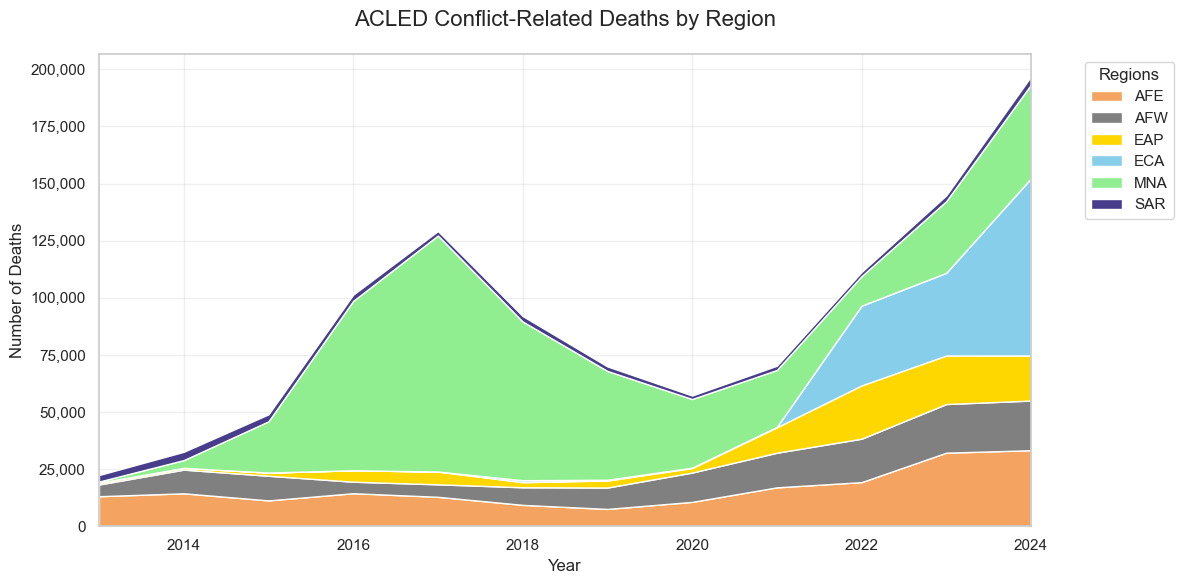

✓ Figure 4 generated successfully


In [18]:
def plot_acled_regional_deaths(df_acled_crd, region_mapper=None):
    """
    Create a stacked area plot of ACLED conflict-related deaths by region
    
    Parameters:
    -----------
    df_acled_crd : pd.DataFrame
        DataFrame with columns: iso3, year, month, ACLED_conflict_related_deaths
    region_mapper : RegionMapper, optional
        Region mapping object (default creates a simple one)
    
    Returns:
    --------
    matplotlib.pyplot
        Stacked area plot of deaths by region
    """
    import pycountry

    if region_mapper is None:
        region_mapper = RegionMapper()
    
    # Comprehensive region mapping
    region_mapping = {
        'AFE': [  # Eastern Africa
            'Kenya', 'Ethiopia', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 
            'Somalia', 'South Sudan', 'Sudan', 'Eritrea', 'Djibouti'
        ],
        'AFW': [  # Western Africa
            'Nigeria', 'Ghana', 'Senegal', 'Mali', 'Burkina Faso', 'Guinea', 
            'Ivory Coast', 'Liberia', 'Sierra Leone', 'Togo', 'Benin', 'Niger', 
            'Gambia', 'Guinea-Bissau', 'Cape Verde'
        ],
        'EAP': [  # East Asia & Pacific
            'China', 'Japan', 'South Korea', 'Indonesia', 'Philippines', 'Vietnam', 
            'Thailand', 'Myanmar', 'Cambodia', 'Laos', 'Malaysia', 'Mongolia', 
            'Singapore', 'Papua New Guinea', 'Australia', 'New Zealand'
        ],
        'ECA': [  # Europe & Central Asia
            'Russia', 'Turkey', 'Ukraine', 'Kazakhstan', 'Uzbekistan', 'Georgia', 
            'Azerbaijan', 'Armenia', 'Moldova', 'Belarus', 'Poland', 'Romania', 
            'Bulgaria', 'Greece', 'Serbia', 'Croatia'
        ],
        'MNA': [  # Middle East & North Africa
            'Egypt', 'Iran', 'Iraq', 'Syria', 'Lebanon', 'Jordan', 'Palestine', 
            'Israel', 'Yemen', 'Saudi Arabia', 'United Arab Emirates', 'Algeria', 
            'Morocco', 'Tunisia', 'Libya', 'Bahrain', 'Kuwait', 'Oman', 'Qatar'
        ],
        'SAR': [  # South Asia
            'India', 'Pakistan', 'Bangladesh', 'Afghanistan', 'Nepal', 'Sri Lanka', 
            'Bhutan', 'Maldives'
        ]
    }
    
    def map_country_to_region(iso3):
        try:
            country_name = pycountry.countries.get(alpha_3=iso3).name
            for region, countries in region_mapping.items():
                if any(country.lower() in country_name.lower() for country in countries):
                    return region
            return 'Other'
        except (AttributeError, ValueError):
            return 'Other'
    
    # Create a copy of the DataFrame to avoid modifying the original
    df = df_acled_crd.copy()
    
    # Add region column
    df['region'] = df['iso3'].apply(map_country_to_region)
    
    # Group by year and region, sum deaths
    yearly_region_deaths = df.groupby(['year', 'region'])['ACLED_conflict_related_deaths'].sum().unstack(fill_value=0)
    
    # Ensure all regions are present
    regions = ['AFE', 'AFW', 'EAP', 'ECA', 'MNA', 'SAR']
    for region in regions:
        if region not in yearly_region_deaths.columns:
            yearly_region_deaths[region] = 0
    
    # Select and order columns
    yearly_region_deaths = yearly_region_deaths[regions]
    
    # Filter for years 2013-2024
    yearly_region_deaths = yearly_region_deaths.loc[2013:2024]
    
    # Create the stacked area plot
    plt.figure(figsize=(12, 6))
    
    # Color palette matching the original figure
    colors = {
        'AFE': '#F4A460',   # Sandy Brown
        'AFW': '#808080',   # Gray
        'EAP': '#FFD700',   # Gold
        'ECA': '#87CEEB',   # Sky Blue
        'MNA': '#90EE90',   # Light Green
        'SAR': '#483D8B'    # Dark Slate Blue
    }
    
    # Plot stacked area
    plt.stackplot(yearly_region_deaths.index, 
                 [yearly_region_deaths[region] for region in regions],
                 labels=regions,
                 colors=[colors[region] for region in regions])
    
    # Styling
    plt.title('ACLED Conflict-Related Deaths by Region', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Deaths', fontsize=12)
    plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(2013, 2024)
    plt.grid(True, alpha=0.3)
    
    # Format y-axis with thousands separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.tight_layout()
    return plt

# Create the plot
plot = plot_acled_regional_deaths(df_acled_crd)
plot.show()

print("✓ Figure 4 generated successfully")

# Figure 4 - Forcibly Displaced Persons
Create an area plot showing trends in global displacement.

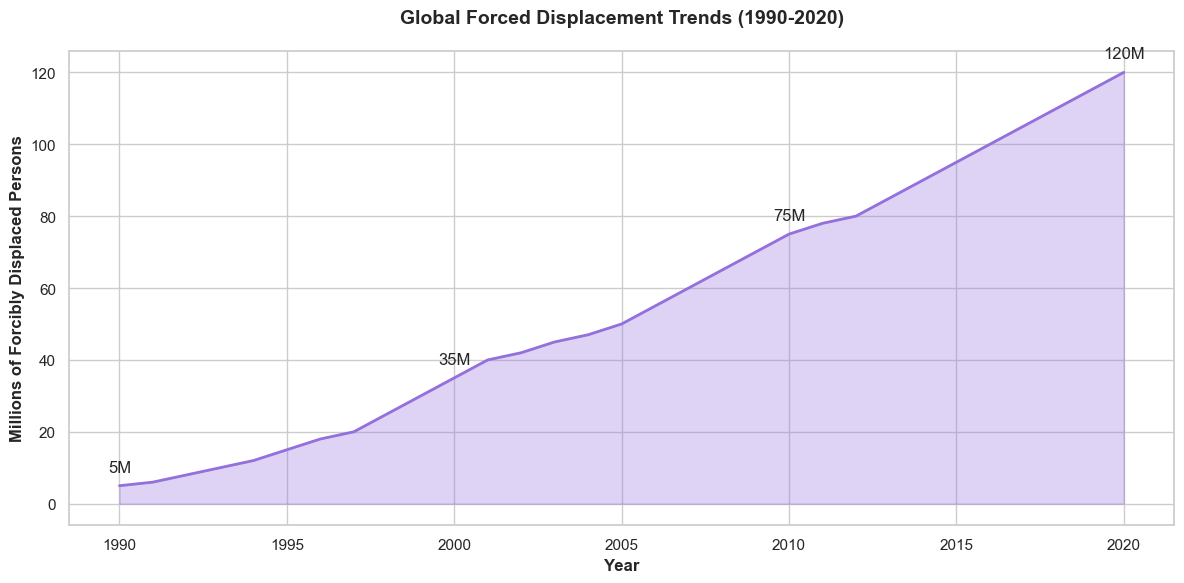

✓ Figure 4 generated successfully


In [6]:
# Create an area plot showing trends in global displacement
def create_displacement_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    displaced = [5, 6, 8, 10, 12, 15, 18, 20, 25, 30, 35, 40, 42, 
                45, 47, 50, 55, 60, 65, 70, 75, 78, 80, 85, 90, 95, 
                100, 105, 110, 115, 120]
    
    # Create area plot
    ax.fill_between(years, displaced, color='#9370DB', alpha=0.3)
    ax.plot(years, displaced, color='#9370DB', linewidth=2)
    
    # Add milestone annotations
    significant_years = [1990, 2000, 2010, 2020]
    for year in significant_years:
        idx = years.index(year)
        ax.annotate(f'{displaced[idx]}M',
                    (year, displaced[idx]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center')
    
    # Customize appearance
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Millions of Forcibly Displaced Persons", 
                 fontsize=12, fontweight='bold')
    ax.set_title("Global Forced Displacement Trends (1990-2020)",
                fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

# Generate and display the plot
fig4 = create_displacement_plot()
plt.show()

print("✓ Figure 4 generated successfully")

# Figure 5 - Fragility Score Trends
Create a scatter plot with connecting lines showing changes in fragility scores based on OECD metrics.

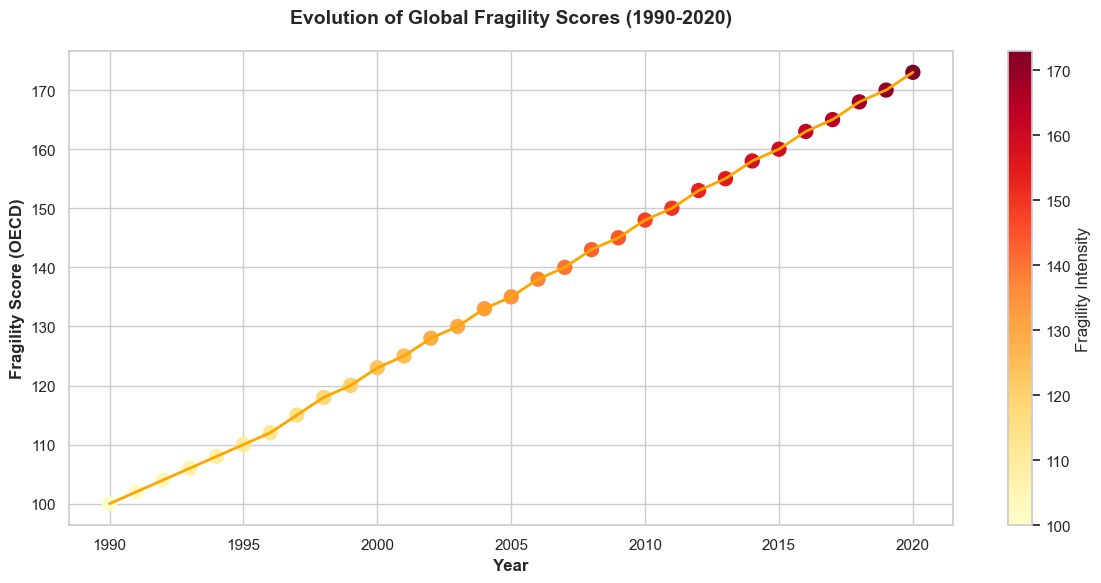

✓ Figure 5 generated successfully


In [7]:
# Create a scatter plot with connecting lines showing changes in fragility scores based on OECD metrics
def create_fragility_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    fragility = [100, 102, 104, 106, 108, 110, 112, 115, 118, 120, 
                123, 125, 128, 130, 133, 135, 138, 140, 143, 145, 
                148, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173]
    
    # Create scatter plot with gradient
    points = ax.scatter(years, fragility, c=fragility, 
                       cmap='YlOrRd', s=100)
    ax.plot(years, fragility, color='#FFA500', linewidth=2)
    
    # Add colorbar
    plt.colorbar(points, label='Fragility Intensity')
    
    # Customize appearance
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Fragility Score (OECD)", fontsize=12, fontweight='bold')
    ax.set_title("Evolution of Global Fragility Scores (1990-2020)",
                fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

# Generate and display the plot
fig5 = create_fragility_plot()
plt.show()

print("✓ Figure 5 generated successfully")